In [20]:

import random
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
random.seed(0)

In [21]:
def undersampling(data_path):
    '''
    label 0인 데이터 중 1000개를 추출하여 다른 label에 맞추기 위해 under sampling 하는 함수
    '''
    df = pd.read_csv(data_path)
    df_only_0 = df[df['label'] == 0][1000:2000].copy()
    df_new = df[df['label'] != 0].copy()
    df_new = pd.concat([df_new, df_only_0])
    return df_new

def swap_sentence(data_path):
    '''
    sentence_1과 sentence_2를 바꾸는 함수
    데이터 불균형 해소 목적으로 증강
    '''
    df = pd.read_csv(data_path)
    df_swapped = df.copy()
    df_swapped['sentence_1'] = df['sentence_2']
    df_swapped['sentence_2'] = df['sentence_1']
    df_swapped = df_swapped[df_swapped['label'] != 0]
    return df_swapped

def copy_sentence(data_path, index_min=250, index_max=750):
    '''
    sentence_1에 sentence_2를 대입하여 같은 문장 배치하는 함수
    label 5인 데이터를 증강하기 위한 목적
    '''
    df = pd.read_csv(data_path)
    df_copied = df[df['label']==0][index_min:index_max].copy()
    df_copied['sentence_1'] = df_copied['sentence_2']
    df_copied['label'] = 5.0
    return df_copied

def concatenate(*dataframe):
    result = pd.concat(dataframe)
    return result

def augmentation(train_data_path, new_data_path):
    df_undersampling = undersampling(train_data_path)
    df_swapped = swap_sentence(train_data_path)
    df_copied = copy_sentence(train_data_path)
    result = concatenate(df_undersampling, df_swapped, df_copied)
    result.to_csv(new_data_path, index=False)

if __name__ == "__main__":
    augmentation('/Users/kim-yongjun/Documents/부스트캠프 AI Tech 7기/5.5. NLP 기초 프로젝트/nlp_project/train.csv', 
                '/Users/kim-yongjun/Documents/부스트캠프 AI Tech 7기/5.5. NLP 기초 프로젝트/nlp_project/aug_train.csv')

Text(0.5, 1.0, '증강된 데이터 분포')

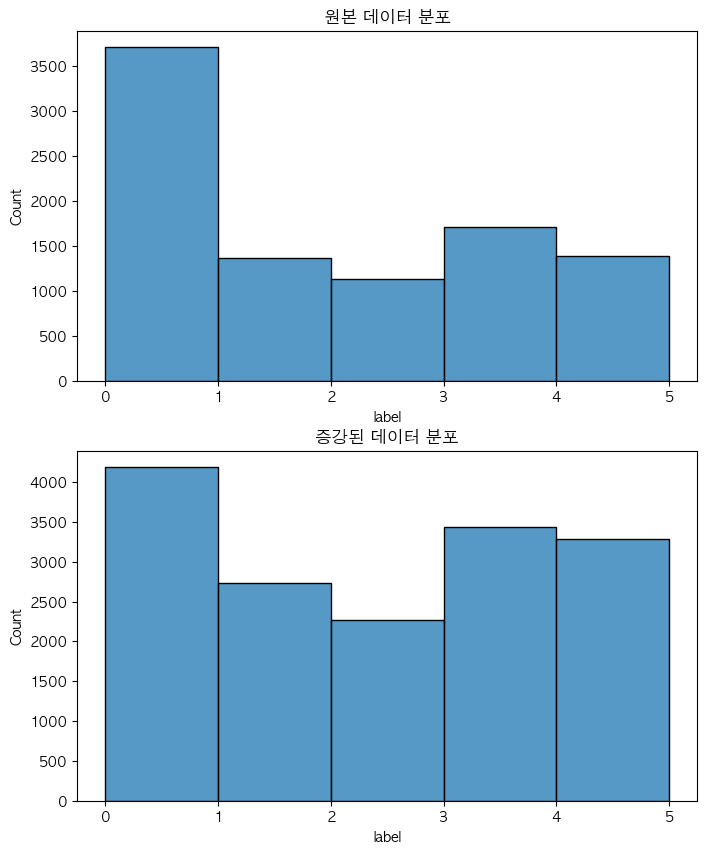

In [24]:
fig, ax = plt.subplots(2,1, figsize = (8,10))
df = pd.read_csv('/Users/kim-yongjun/Documents/부스트캠프 AI Tech 7기/5.5. NLP 기초 프로젝트/nlp_project/train.csv')
aug_df = pd.read_csv('/Users/kim-yongjun/Documents/부스트캠프 AI Tech 7기/5.5. NLP 기초 프로젝트/nlp_project/aug_train.csv')
sns.histplot(df['label'], bins = 5, ax = ax[0])
sns.histplot(aug_df['label'], bins = 5, ax = ax[1])
ax[0].set_title('원본 데이터 분포')
ax[1].set_title('증강된 데이터 분포')
